# Week 03

In this practical we will implement different versions of the Perceptron model introduced during this week lectures. As presented during lectures, the simplest Perceptron is a model that implements the following function:
\begin{equation*}
y=\Theta(w_1x_1 + w_2x_2 + \dots + w_kx_k + b)=\Theta(wx+b)
\end{equation*}
where:
\begin{equation*}
\Theta(v)= 
  \begin{cases} 
   1 & \text{if } v \geq 0 \\
   0       & \text{if } v < 0
  \end{cases}
\end{equation*}



## Task 1: Using perceptron to implement logical functions 
In this task you will use perceptron to implement different logical functions: NOT, AND, OR and XOR. For a logical function, both the input and the output have only two possible states: 0 and 1 (i.e., False and True). The  step binary activation function fits the purpose well since it produces a binary output.

In [3]:
from sklearn import metrics
import numpy as np

***
**T1.1 Implementing the step binary activation function**

In this task we implement binary step function introduced during lecture. The method takes one input. If the input value is equal or greater than zero, the method should return one, otherwise it returns zero. Note the the method `step_binary` implemented below will work for both scalar and vector inputs. You can test it by passing a scalar and a numpy array as input to the method.

In [4]:
def step_binary(v):
    return 1 * (v > 0)

***
**T1.2 Implementing perceptron**

In this task we implement a method which performs operation of a perceptron. It takes three inputs: `x`, `w` and `b`. `x` represents the input variables, `w` represents weights of the perceptron and `b` stands for the bias. The method returns $\Theta(wx+b)$, where $\Theta$ is the activation function.

In [5]:
def perceptron(x,w,b):
    v = np.dot(x,w)+b 
    out = step_binary(v)
    return out

***
**T1.3 Implementing NOT logical function**

NOT(x) is a 1-variable function, this means that we will have one input at a time (number of input variables $k=1$). In this task we implement a method, which takes a single value as input (we can skip validation of the input and assume that it is always correct: zero or one) and returns its negation using the perceptron method with appropriate values of the parameters `w` and `b`. Note that the main challenge of this task is finding the values of parameters `w` and `b`, which allows the perceptron to implement the NOT logical function. There are many different solutions that we could use, in this example we use $w=-1$ amd $b = 0.5$.

In [6]:
def NOT_(x):
    return perceptron(x, -1, 0.5)

Call the method passing $0$ or $1$ as parameter in order to evaluate whether it works correctly (i.e returns negation of the input).

In [7]:
NOT_(1)

0

***
**T1.4 Implementing AND logical function**

The AND logical function is a 2-variables function, $AND(x_1, x_2)$, with binary inputs and output.

0 AND 1 = 0

1 AND 0 = 0

0 AND 0 = 0

1 AND 1 = 1

In this task we implement a method, which takes two values as an input and it returns the conjunction (AND) of the two boolean values. This time the perceptron is associated with the following computation: $y = \theta(w_1x_1 + w_2x_2 + b)$. As in the previous task, we need to figure out what values of parameters $w_1$, $w_2$, and $b$ need to be used for the perceptron to behaves as AND logical operator. We will try $w_1=1, w_2=1$ and $b=-1.5$.

In [9]:
def AND_(x):
    return perceptron(x, np.array([1,1]),-1.5)

Call the method with the following examples in order to test whether it behaves as expected.

In [12]:
AND_([1,1])

1

***
**T1.5 Implementing OR logical functions**

Following the same idea, implement method which performs OR operation as follow:

0 OR 1 = 1

1 OR 0 = 1

0 OR 0 = 0

1 OR 1 = 1

Can you guess values of the parameters that will make the perceptron operate as the OR logical function?

In [13]:
def OR_(x):
    return perceptron(x, np.array([1,1]),-0.5)

***
**T1.6 Implementing XOR logical function**

In the previous tasks you have developed three fundamental logical perceptrons: NOT, AND and OR. Now you have to build a network of those perceptrons so that it implements XOR function:

0 XOR 1 = 1

1 XOR 0 = 1

0 XOR 0 = 0

1 XOR 1 = 0

The solution is as follow:
\begin{equation*}
XOR(x_1,x_2) = AND(NOT(AND(x_1,x_2)),OR(x_1,x_2))
\end{equation*}

Using the above formula, implement a method which performs XOR operation. 

In [15]:
def XOR_(x):
    o1=AND_(x)
    o2=NOT_(o1)
    o3=OR_(x)
    o4=AND_(np.array([o2,o3]))
    return o4

## Task 2: Training Perceptron with Simple Update Rule

In this task we will implement a simply perceptron and train it by applying the Simple Update Rule introduced during one of our lectures. Note that training perceptron means searching for the optimal values of its parameters `w` and `b` (instead of guessing them as we did in the previous task). 

***
**T2.1 Loading dataset**

1. We will first load some of the toy datasets for binary classification from the sckit-learn library. Familiarise yourself with the format of the `Breast Cancer` dataset. 
2. We will split the dataset into input and output variables.
3. We will scale the input variable using $min$ $max$ $scaling$ method.  

In [17]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

bc = datasets.load_breast_cancer()

#extracting input and output variables
x = bc.data[:,:-1]
y = bc.target
x
#scaling the input data
x = preprocessing.MinMaxScaler().fit_transform(x)
print(y.shape)

(569,)


***
**T2.2 Implementing the Update Rule for training perceptron**

You need to implement a method (perceptron update rule), which updates the parameters of the perceptron as per pseudo code: 

__Input:__ training set $x=\{x^1, \dots, x^n\}, y=\{y^1,\dots,y^n\}$, learning rate $\alpha$ 

1. Initialize weights $w_1,\dots,w_k$ and $b$ with random values. Use [uniform distribution](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.uniform.html) to assign values between -1 and 1 to each parameter. Note that the weights vector should have the same dimension as the input and the bias is just a scalar.

2. For each $x^j=<x_1, \dots, x_k>$ from x:

   - Pass $x^j$ as input to the perceptron with weights $w_1,\dots,w_k$ and bias $b$
   - Compute the error $e$ as the difference between the expected value and the output of the perceptron $y_j-\bar{y}^j$
   - Adjust the parameters according to the formulas: $w_{i}^{new}=w_i+\alpha ex^j$     $\hspace{10mm} b^{new}=b+\alpha e$ 

In [24]:
from sklearn import metrics
np.random.seed(0)
def updateRule(x,y,a):
    weights = np.random.uniform(-1,1,x.shape[1])
    b = np.random.uniform(-1,1,1)
    
    for i in range(len(x)):
        prediction = perceptron(x[i], weights, b)
        error = y[i]-prediction
        weights = weights + a * error * x[i]
        b = b + a*error
    
    #Calculating predictions
    predictions = perceptron(x,weights, b)
    #Calculating error
    print('MSE: ', metrics.mean_squared_error(predictions,y))
    print('Accuracy:', metrics.accuracy_score(predictions,y))

updateRule(x,y,0.01)

MSE:  0.38137082601054484
Accuracy: 0.6186291739894552


***
**T2.3 Evaluating the perceptron model** 

Evaluate the perceptron before (parameters assigned with random values) and after training (parameters updated via the update rule). At this point we can just use our training data for the evaluation. Apply 0.01 as the value of the learning rate. Since we are dealing with a classification problem (we are predicting labels: 1 or 0) you can also use the [accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html) metric (mean absolute/squared error metrics are also fine).

Note that the weights are assigned randomly at the beginning, which means that you can obtain different result each time unless you set the seed of the random number generator (np.random.seed(0)). Run you program number of times to see whether the perceptron improves each time as a result of the training.

In [30]:
np.random.seed(0)
def updateRule(x,y,a):
    weights = np.random.uniform(-1,1,x.shape[1])
    b = np.random.uniform(-1,1,1)
    predictions = perceptron(x,weights, b)
    #Calculating error
    print('MSE: ', metrics.mean_squared_error(predictions,y))
    print('Accuracy:', metrics.accuracy_score(predictions,y))
    
    for i in range(len(x)):
        prediction = perceptron(x[i], weights, b)
        error = y[i]-prediction
        weights = weights + a * error * x[i]
        b = b + a*error
    
    #Calculating predictions
    predictions = perceptron(x,weights, b)
    #Calculating error
    print('MSE: ', metrics.mean_squared_error(predictions,y))
    print('Accuracy:', metrics.accuracy_score(predictions,y))

updateRule(x,y,0.01)

MSE:  0.3884007029876977
Accuracy: 0.6115992970123023
MSE:  0.38137082601054484
Accuracy: 0.6186291739894552


**T2.4 Increasing the time of training**

As you could observe, applying the Update Rule only once to the training data set may not be enough to obtain a good model, in particular in the case of unfavorable initialization of the parameters. Increase the training of the model by applying the Update Rule multiple times to the training dataset (using for loop) to see if you can get more consistent results.

In [31]:
np.random.seed(0)
def updateRule(x,y,a):
    weights = np.random.uniform(-1,1,x.shape[1])
    b = np.random.uniform(-1,1,1)
    predictions = perceptron(x,weights, b)
    #Calculating error
    print('MSE: ', metrics.mean_squared_error(predictions,y))
    print('Accuracy:', metrics.accuracy_score(predictions,y))
    
    for j in range(10):
        for i in range(len(x)):
            prediction = perceptron(x[i], weights, b)
            error = y[i]-prediction
            weights = weights + a * error * x[i]
            b = b + a*error
    
    #Calculating predictions
    predictions = perceptron(x,weights, b)
    #Calculating error
    print('MSE: ', metrics.mean_squared_error(predictions,y))
    print('Accuracy:', metrics.accuracy_score(predictions,y))

updateRule(x,y,0.01)

MSE:  0.3884007029876977
Accuracy: 0.6115992970123023
MSE:  0.1054481546572935
Accuracy: 0.8945518453427065


## Task 3: Training perceptron with back propagation



The Simple Update Rule works well for simple perceptrons with binary step activation function. However, for more complex Neural Networks it is insufficient. In this task you will use perceptron with sigmoid activation function. From the lecture we know that for an instance $x=<x_1,\dots,x_k>$ the input of a perceptron is calculated as $in=x_1w_1 +\dots +x_kw_k +b$ where weights $w=\left( \begin{array}{c} w_1 \\ w_2 \\ \dots \\ w_k \end{array} \right)$ and bias $b$ are the parameters of the perceptron. Following this, the output of the perceptron is calculated as: $O=\frac{1}{1+e^{-in}}$.

In this task we will train the perceptron using the back propagation and gradient descent algorithms. The pseudo code of the gradient descent algorithm is presented below:

Set weights $w$ and bias $b$ to random values.

For each $(x,y)$ in training set:
1. Pass $x$ through perceptron and calulate the outpu $O$
2. Calculate derivative of the error function $E$ with respect to each parameter
3. Update each weight according to the formula: $w_i = w_i - \alpha\frac{\sigma E}{\sigma w_i}$
4. Update the bias according to the formula: $b = b - \alpha\frac{\sigma E}{\sigma b}$

***
**T3.1 Loading dataset**

In this task we solve a simple regression problem using perceptron. The dataset `simpleregression` contains 2D data points, each assigned with an output value between 0 and 1. Familiarize yourself with the dataset.

The two first features are the input variables and the last feature is the target output.

In [32]:
from sklearn.model_selection import train_test_split
data = np.loadtxt("simpleregression.txt")

#extract input and output values
x = data[:,:2]
y = data[:,2]
print(x.shape)

(100, 2)


We will split the data into training and testing sets.

In [33]:
#spliting data into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

***
**T3.2 Implementing sigmoid activation function and derivative of the sigmoid function**

Given that the target values (values that we will be trying to predict) are between 0 and 1, we can use sigmoid activation function. In this task we implement two methods, which for a given input $v$ return the value of the sigmoid function and its derivative, respectively. From the lecture we know that the sigmoid function is define by the formula: $f(x)=\frac{1}{1+e^{-x}}$ and its derivative can be calculated as: $f'(x) = \frac{1}{1+e^{-x}}*(1-\frac{1}{1+e^{-x}})$

In [34]:
def sigmoid(v):
    return 1/(1+np.exp(-v))

In [35]:
def sigmoid_derivative(v):
    return sigmoid(v)*(1-sigmoid(v))

***
**T3.3 Implementing the forward pass**

We will start with implementing the forward pass (feedforward) of the perceptron. The matrix notation of the forward pass of an input $x=(x_1 \dots x_k)$ through the perceptron is formulated as follows:

$$ in = \left( \begin{array}{cc} x_1 & x_2 & \dots x_k \end{array}\right) 
\left( \begin{array}{c} w_1 \\ w_2 \\ \dots \\ w_k \end{array} \right) + b$$
$$O=\frac{1}{1+e^{-in}}$$

Where $w$ and $b$ are the weights (column vector of dimension $k$) and the bias (scalar), respectively and $O$ stands for the output of the perceptron.

We will start with initialising the weights and the bias with random values. Then we will implement the forward pass of the perceptron as $O=\frac{1}{1+e^{-(xw+b)}}$.

In [36]:
import numpy as np

#fixing seed of the random number generator, this will ensure that we always get the same result
np.random.seed(42) 

#initialising parameters
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(-1,1,1)
l = 0.05

#forward pass
for i in range(len(x_train)):
    #forward pass
    in_ = x_train[i]@w+b
    out = sigmoid(in_)

***
**T3.4 Error calculation**

No we can calculate the error using the output $O$ and the target value $y$. We will use the squared error formula introduce during lectures:
$$E=\frac{1}{2}(y-O)^2$$

Note that since we are passing a single instance as input to the perceptron, both $O$ and $y$ are scalars.

In [37]:
np.random.seed(42)

#initialising parameters
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(-1,1,1)
l = 0.05

for i in range(len(x_train)):
    #forward pass
    in_ = x_train[i]@w+b
    out = sigmoid(in_)
    
    #error calculation
    error = (1/2)*(np.power((out-y_train[i]),2))

***
**T3.5 Implementing backpropagation**

The goal of backpropagation is to compute the following partial derivatives: $\frac{\sigma E}{\sigma w}$ and $\frac{\sigma E}{\sigma b}$.

Following the chain rule we know that:
\begin{equation*}
\frac{\sigma E}{\sigma w_i} = \frac{\sigma E}{\sigma O} \times \frac{\sigma O}{\sigma in} \times \frac{\sigma in}{\sigma w_i}
\end{equation*}

\begin{equation*}
\frac{\sigma E}{\sigma b} = \frac{\sigma E}{\sigma O} \times \frac{\sigma O}{\sigma in} \times \frac{\sigma in}{\sigma b}
\end{equation*}

The partial derivatives can then be calculated as:

$\frac{\sigma E}{\sigma O} = O-y$ - this is derivative of the squared error function and it is a scalar

$\frac{\sigma O}{\sigma in} = \underbrace{\frac{1}{1+e^{-in}}(1-\frac{1}{1+e^{-in}})}_{\text{this is derivative of the sigmoid function and it is a scalar}}$

$\frac{\sigma E}{\sigma in} = \frac{\sigma E}{\sigma O} \times \frac{\sigma O}{\sigma in} = (O-y)*\frac{1}{1+e^{-in}}(1-\frac{1}{1+e^{-in}})$

$\frac{\sigma in}{\sigma w_i}= \underbrace{x_i}_{\text{ith input variable}}$

$\frac{\sigma E}{\sigma w_i} = \frac{\sigma E}{\sigma O}\times \frac{\sigma O}{\sigma in}\times \frac{\sigma in}{\sigma w_i}= (O-y)*\frac{1}{1+e^{-in}}(1-\frac{1}{1+e^{-in}})* x_i$

$\frac{\sigma E}{\sigma b}=\frac{\sigma E}{\sigma O}\times \frac{\sigma O}{\sigma in}\times \frac{\sigma in}{\sigma b} = (O-y)*\frac{1}{1+e^{-in}}(1-\frac{1}{1+e^{-in}})*\underbrace{1}_{\frac{\sigma in}{\sigma b}}$

Using matrix notation, we can calculate the derivatives of the error as:

$$\frac{\sigma E}{\sigma w} = x.T*\frac{1}{1+e^{-in}}*(1-\frac{1}{1+e^{-in}})*(O-y)$$

$$\frac{\sigma E}{\sigma b} = \frac{1}{1+e^{-in}}(1-\frac{1}{1+e^{-in}})* (O-y)$$

We transpose $x$ so that the derivative is in the same format as $w$. This makes the update step easier. Please go back to the lecture slides if you need more explanation.

We will apply learning rate $\alpha=0.05$.

In [38]:
np.random.seed(42)

#initialising parameters
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(1)
l = 0.05

for i in range(len(x_train)):
    #forward pass
    in_ = x_train[i]@w+b
    out = sigmoid(in_)
    
    #error calculation
    error = (1/2)*(np.power((out-y_train[i]),2))
    
    #backpropagation
    dEdOut = out - y_train[i]
    dOutdIn = sigmoid_derivative(x_train[i]@w + b)
    dEdIn = dEdOut*dOutdIn
    dIndW = x_train[i]
    dEdW = (dIndW.reshape(len(dIndW),1))*dEdIn #transposing 1D arrya, we can only use x.T for 2D or higher array
    dEdB = dEdIn*1

***
**T.3.6 Updating weights and bias**

Now that we calculated $\frac{\sigma E}{\sigma w}$ and $\frac{\sigma E}{\sigma b}$ we can update the parameters of the perceptron (i.e. weights and bias) following the Gradient Descent algorithm.

In [39]:
np.random.seed(42)

#initialising parameters
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(1)
l = 0.05

for i in range(len(x_train)):
    #forward pass
    in_ = x_train[i]@w+b
    out = sigmoid(in_)
    
    #error calculation
    error = (1/2)*(np.power((out-y_train[i]),2))
    
    #backpropagation
    dEdOut = out - y_train[i]
    dOutdIn = sigmoid_derivative(x_train[i]@w + b)
    dEdIn = dEdOut*dOutdIn
    dIndW = x_train[i]
    dEdW = (dIndW.reshape(len(dIndW),1))*dEdIn #transposing 1D arrya, we can only use T for 2D or higher array
    dEdB = dEdIn*1
   
    #updating parameters of the model
    w = w - l*dEdW
    b = b - l*dEdB

***
**T3.7 Evaluation the Perceptron**

In order to see whether the model improved after the training, calculate predictions for the train and test datasets and evaluate the performance using the mean square error metric. Compare the error before and after training to see whether there is any improvement. You can copy the code from the previous cell and update it accordingly.

In [47]:
np.random.seed(0)

#initialising parameters
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(1)
l = 0.05
print('train_error: ', metrics.mean_squared_error(sigmoid(x_train@w+b),y_train))
print('test_error:', metrics.mean_squared_error(sigmoid(x_test@w+b),y_test))

for i in range(len(x_train)):
    #forward pass
    in_ = x_train[i]@w+b
    out = sigmoid(in_)
    
    #error calculation
    error = (1/2)*(np.power((out-y_train[i]),2))
    
    #backpropagation
    dEdOut = out - y_train[i]
    dOutdIn = sigmoid_derivative(x_train[i]@w + b)
    dEdIn = dEdOut*dOutdIn
    dIndW = x_train[i]
    dEdW = (dIndW.reshape(len(dIndW),1))*dEdIn #transposing 1D arrya, we can only use T for 2D or higher array
    dEdB = dEdIn*1
   
    #updating parameters of the model
    w = w - l*dEdW
    b = b - l*dEdB
    
print('train_error: ', metrics.mean_squared_error(sigmoid(x_train@w+b),y_train))
print('test_error:', metrics.mean_squared_error(sigmoid(x_test@w+b),y_test))

train_error:  0.311777375609104
test_error: 0.3191802851880966
train_error:  0.2187886709519981
test_error: 0.227954585830263


***
**T3.8 Increasing batch size (Batch Gradient Descent Algorithm)**

Edit your BP code so that the parameters are updated after the entire training set is passed through the perceptron. In other words, the batch size is equals to the size of the training set, not one like in the previous case. You can follow the same procedure as previously but use matrix notation so that the gradient is calculated for all the instances from the training dataset simultaneously. The parameters should be updated using the average of gradients obtained for all instances in the training dataset.

Hints:

- the input is a matrix of shape [$n=$no if instances in train set, $k=$no of features] 
- the output of the perceptron is a column vector, make sure that the vector with target values $y$ is of the same format. You may need to [re-shape it](https://note.nkmk.me/en/python-numpy-reshape-usage/).

Using matrix notation, we can calculate the derivatives of the error as:

<br>

$$\frac{\sigma E}{\sigma w} = \frac{1}{n} * \underbrace{X.T}_{\text{transposed input matrix}}@\left(\underbrace{\frac{1}{1+e^{-in}}*(1-\frac{1}{1+e^{-in}})}_{\text{derivative of the sigmoid function} \\ \text{and it is a column vector of dimension $n$}}*\underbrace{(O-y)}_{\text{this is derivative of the squared error function} \\ \text{ and it is a column vector of dimension $n$.}}\right)$$

<br>

$$\frac{\sigma E}{\sigma b} = \frac{1}{n} *  \underbrace{\overrightarrow{1}}_{\text{matrix [1,n]}} @ \left(\frac{1}{1+e^{-in}}(1-\frac{1}{1+e^{-in}})* (O-y)\right)$$

<br>

You can copy the code from the previous cell and update it accordingly.

Evaluate the model and compare it with the previous results. What are your observations?


In [50]:
np.random.seed(42)

#initialising parameters
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(1)
l = 0.05

y_train=y_train.reshape(len(y_train),1)

print('Train error: ', metrics.mean_squared_error(sigmoid(x_train@w+b),y_train))
print('Test error: ', metrics.mean_squared_error(sigmoid(x_test@w+b),y_test))


#forward pass
in_ = x_train@w+b
out = sigmoid(in_)

#error calculation
error = (0.5)*(np.power((out-y_train),2)).mean()

#backpropagation
dEdOut = out - y_train
dOutdIn = sigmoid_derivative((x_train@w) + b) #dot will also work here
dEdIn = dEdOut*dOutdIn
dIndW = x_train
dEdW = (1/x_train.shape[0])*(dIndW.T@(dEdIn))
dEdB = (1/x_train.shape[0])*np.ones([1,len(x_train)])@(dEdOut*dOutdIn)

#updating weights
w -= l*dEdW
b -= l*dEdB

print('Train error: ', metrics.mean_squared_error(sigmoid(x_train@w+b),y_train))
print('Test error: ', metrics.mean_squared_error(sigmoid(x_test@w+b),y_test))

Train error:  0.30733940811935995
Test error:  0.3124103150377586
Train error:  0.3062008196230307
Test error:  0.31128305826389624


***
**T3.9 Increasing number of epochs**

One epoch means that all instances from the training set were passed through the network. Use a for loop in order to increase the number of epochs, i.e. to repeat the BP multiple times. You can test different number of epochs, you should get better results than before.

In [51]:
np.random.seed(42)

#initialising parameters
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(1)
l = 0.05

y_train=y_train.reshape(len(y_train),1)

print('Train error: ', metrics.mean_squared_error(sigmoid(x_train@w+b),y_train))
print('Test error: ', metrics.mean_squared_error(sigmoid(x_test@w+b),y_test))

for epoch in range(1000):
    #forward pass
    in_ = x_train@w+b
    out = sigmoid(in_)

    #error calculation
    error = (0.5)*(np.power((out-y_train),2)).mean()

    #backpropagation
    dEdOut = out - y_train
    dOutdIn = sigmoid_derivative((x_train@w) + b) #dot will also work here
    dEdIn = dEdOut*dOutdIn
    dIndW = x_train
    dEdW = (1/x_train.shape[0])*(dIndW.T@(dEdIn))
    dEdB = (1/x_train.shape[0])*np.ones([1,len(x_train)])@(dEdOut*dOutdIn)

    #updating weights
    w -= l*dEdW
    b -= l*dEdB

print('Train error: ', metrics.mean_squared_error(sigmoid(x_train@w+b),y_train))
print('Test error: ', metrics.mean_squared_error(sigmoid(x_test@w+b),y_test))

Train error:  0.30733940811935995
Test error:  0.3124103150377586
Train error:  0.025985513613512347
Test error:  0.043478365472819594


***
**T.3.10 Visualizing the train/test error**

Visualize how the train/test error changes across the epochs using matplotlib. For this purpose you should create two empty lists $train=[]$ and $test=[]$. For each epoch calculate the train and test error and [append them to the lists](https://docs.python.org/2/tutorial/datastructures.html). Finally, once the perceptron is trained you will be able to visualize the error as follows:

z=np.arange(number of epochs)<br>
plt.plot(z,train,label="train",color='red')<br>
plt.plot(z,test,label="test",color='blue')<br>
plt.legend(loc='best')<br>
plt.show()

In [53]:
import matplotlib.pyplot as plt
np.random.seed(42)
train=[]
test=[]

#initialising parameters
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(1)
l = 0.05

y_train=y_train.reshape(len(y_train),1)


for epoch in range(1000):
    #forward pass
    in_ = x_train@w+b
    out = sigmoid(in_)

    #error calculation
    error = (0.5)*(np.power((out-y_train),2)).mean()
    error_test=(0.5)*(np.power((sigmoid(x_test@w+b)-y_test),2)).mean()
    train.append(error)
    test.append(error_test)
    

    #backpropagation
    dEdOut = out - y_train
    dOutdIn = sigmoid_derivative((x_train@w) + b) #dot will also work here
    dEdIn = dEdOut*dOutdIn
    dIndW = x_train
    dEdW = (1/x_train.shape[0])*(dIndW.T@(dEdIn))
    dEdB = (1/x_train.shape[0])*np.ones([1,len(x_train)])@(dEdOut*dOutdIn)

    #updating weights
    w -= l*dEdW
    b -= l*dEdB

z=np.arange(1000)
plt.plot(z,train,label="train",color='red')
plt.plot(z,test,label="test",color='blue')
plt.legend(loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

# 4. Using Perceptron for binary classification

***
**T4.1 Implementing perceptron for classification**

Apply Batch Gradient Descent to train a perceptron model with the binary classification dataset uploaded below. You should use binary cross entropy loss function instead of MSE. Apart form the error, calculate the accuracy of the predictions made by the model on the train and test sets in each epoch. In order to convert outputs of the sigmoid function (floats between 0 and 1) into labels (0 or 1), you can apply a threshold of 0.5 (i.e. if the output is greater that 0.5 then the prediction is 1, otherwise the prediction is 0). There is a very useful numpy [method](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html) that can help with this. Visualize how the train/test error and accuracy change over the epochs. Use 1000 epochs.

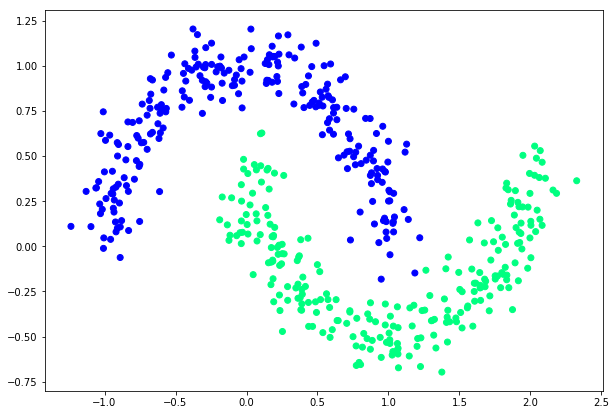

In [55]:
import matplotlib.pyplot as plt
X, y = datasets.make_moons(500, noise=0.1)
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.winter)

y=y.reshape(len(y),1)
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [56]:
def crossEntrop(o,y):
    return (-y*(np.log(o)) - (1-y)* np.log(1-o))

In [57]:
def crossEntrDeriv(o,y):
    return -(y/o - (1-y)/(1-o))

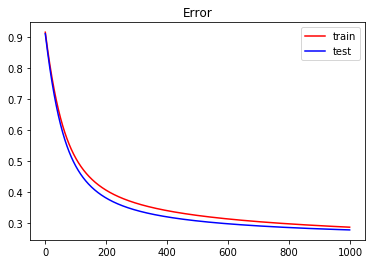

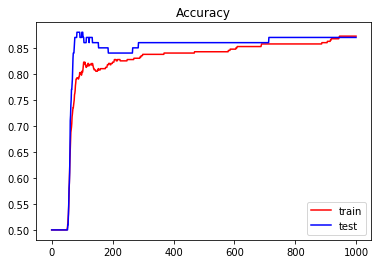

In [63]:
np.random.seed(0)

#initialising parameters
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(1)
l = 0.05

y_train=y_train.reshape(len(y_train),1)

train_E = []
test_E = []
train_Acc = []
test_Acc = []

for i in range(1000):
    #forward pass
    in_ = x_train@w+b
    out = sigmoid(in_)

    #error calculation
    error_train = crossEntrop(out,y_train)
    error_test = crossEntrop(sigmoid(x_test@w+b),y_test)
    train_E.append(error_train.mean())
    test_E.append(error_test.mean())
    
    predictions_train = np.where(out > 0.5, 1,0)
    prediction_test = np.where(sigmoid(x_test@w+b) > 0.5,1,0)
    train_Acc.append(metrics.accuracy_score(y_train,predictions_train))
    test_Acc.append(metrics.accuracy_score(y_test,prediction_test))

    #backpropagation
    dEdOut = crossEntrDeriv(out,y_train)
    dOutdIn = sigmoid_derivative((x_train@w) + b) #dot will also work here
    dEdIn = dEdOut*dOutdIn
    dIndW = x_train
    dEdW = (1/x_train.shape[0])*(dIndW.T@(dEdIn))
    dEdB = (1/x_train.shape[0])*np.ones([1,len(x_train)])@(dEdOut*dOutdIn)

    #updating weights
    w -= l*dEdW
    b -= l*dEdB

z=np.arange(1000)
f1=plt.figure(1)
plt.plot(z,train_E,label="train",color='red')
plt.plot(z,test_E,label="test",color='blue')
#plt.plot(z,test,label="test",color='blue')
plt.legend(loc='best')
plt.title('Error')
f1.show()
f2=plt.figure(2)
plt.plot(z,train_Acc,label="train",color='red')
plt.plot(z,test_Acc,label="test",color='blue')
#plt.plot(z,test,label="test",color='blue')
plt.legend(loc='best')
plt.title('Accuracy')
f2.show() 

***
**T4.2 Evaluating model with cross validation**

Instead of splitting the dataset into train and test sets as in T4.1, use 5-cross validation. Report the average accuracy across the folds. 

In [69]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
np.random.seed(0)
test_Acc = []#for storing test error from each fold

for train_index, test_index in kf.split(x):
    #initialising parameters
    w = np.random.uniform(-1,1,[x_train.shape[1],1])
    b = np.random.uniform(1)
    l = 0.05

    y_train=y_train.reshape(len(y_train),1)
    for i in range(1000):
        in_ = x[train_index]@w+b
        out = sigmoid(in_)
        
        #error calculation
        error_train = crossEntrop(out,y[train_index])

        #backpropagation
        dEdOut = crossEntrDeriv(out,y[train_index])
        dOutdIn = sigmoid_derivative((x[train_index]@w) + b) #dot will also work here
        dEdIn = dEdOut*dOutdIn
        dIndW = x[train_index]
        dEdW = (1/x[train_index].shape[0])*(dIndW.T@(dEdIn))
        dEdB = (1/x[train_index].shape[0])*np.ones([1,len(x[train_index])])@(dEdOut*dOutdIn)

        #updating weights
        w -= l*dEdW
        b -= l*dEdB
    scores=np.where(sigmoid(x[train_index]@w+b)>0.5,1,0)
    test_Acc.append(metrics.accuracy_score(y[train_index], scores))
print('Test Accuracy: ',sum(test_Acc)/len(test_Acc))

Test Accuracy:  0.5399999999999999


# 5. Solving Regression problem with Batch and Mini-batch GD

***

Implement Batch Gradient Descent and Mini-Batch Gradient Descent to train a perceptron with diabetes dataset from [sklearn](https://scikit-learn.org/stable/datasets/index.html). Use Leaky ReLu (you can also try ReLu) as activation function and 64 as the size of the mini-batch (try different sizes of mini-batch). Compare the errors obtained by both of the algorithms after 500 training epochs (try different numbers of epochs to see what happens). Check whether scaling the input data makes any difference.

In [70]:
x, y = datasets.load_diabetes(return_X_y=True)
y=y.reshape(len(y),1)
#scaling the input data
x = preprocessing.MinMaxScaler().fit_transform(x)

In [71]:
def LReLU(x):
    return np.where(x > 0, x, x * 0.01)

def dLReLU(x):
    return np.where(x > 0, 1, 0.01)

Error after training:  1535.6951828845488


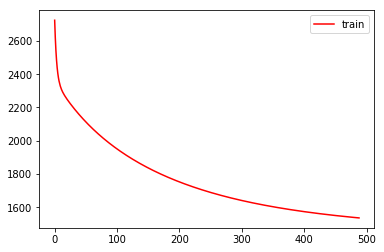

In [76]:
np.random.seed(0)

#initialising parameters
w = np.random.uniform(-1,1,[x.shape[1],1])
b = np.random.uniform(1)
l = 0.05

y_train=y.reshape(len(y),1)

error=[]

for epoch in range(500):
    #forward pass
    in_ = x@w+b
    out = LReLU(in_)

    #error calculation
    error_train = (0.5)*(np.power((out-y),2))
    if epoch > 10: #skipping the first few epochs so the error on the graph is better visible
        error.append(error_train.mean())
    

    #backpropagation
    dEdOut = out-y
    dOutdIn = dLReLU(in_)
    dEdIn = dEdOut*dOutdIn
    dIndW = x
    dEdW = (1/x.shape[0])*(dIndW.T@(dEdIn))
    dEdB = (1/x.shape[0])*np.ones([1,len(x)])@(dEdOut*dOutdIn)

    #updating weights
    w -= l*dEdW
    b -= l*dEdB
    
print('Error after training: ',error[len(error)-1]) 
    
z=np.arange(len(error))
plt.plot(z,error,label="train",color='red')
plt.legend(loc='best')
plt.show()

Error after training:  1439.4207794013164


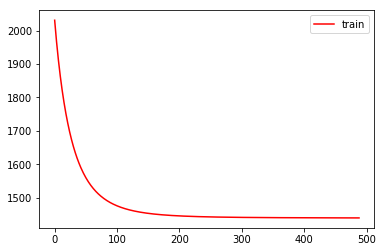

In [77]:
minibatch_size = 64

#initializing weights
np.random.seed(0)
w = np.random.uniform(-1,1,[x.shape[1],1])
b = np.random.uniform(1)
l = 0.05

error = []

for epoch in range(500):
    for i in range(0, x.shape[0], minibatch_size):
        x_mini = x[i:i + minibatch_size,:]
        y_mini = y[i:i + minibatch_size,:]
        
         #feed forward
        in_ = x_mini@w + b
        out = LReLU(in_)

        #error
        error_train = 0.5*np.power((out-y_mini),2)

        #backpropagation
        dEdOut = out - y_mini
        dOutdIn = dLReLU(in_) 
        dEdIn = dEdOut*dOutdIn
        dIndW = x_mini
        dEdW = (1/x_mini.shape[0])*dIndW.T@(dEdIn)
        dEdB = (1/x_mini.shape[0])*np.ones([1,len(x_mini)])@(dEdOut*dOutdIn)
        w -= l*dEdW
        b -= l*dEdB
    
    if epoch > 10:
        error.append(0.5*np.power((LReLU(x@w + b)-y),2).mean())

print('Error after training: ',error[len(error)-1])
        
z=np.arange(len(error))
plt.plot(z,error,label="train",color='red')
plt.legend(loc='best')
plt.show()